<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/OBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing required libraries
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


In [19]:
infy=pd.read_csv('/content/INFY.NS.csv')
print(infy.shape)

infy.index = infy["Date"].apply(lambda x: pd.Timestamp(x))
infy.drop("Date", axis=1, inplace=True)
infy.head()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,570.500000,574.775024,560.650024,568.575012,516.459229,8072702
2018-04-03,567.349976,571.775024,564.049988,570.224976,517.957886,4077168
2018-04-04,572.000000,572.275024,560.000000,562.099976,510.577576,4813302
2018-04-05,569.775024,575.650024,564.549988,573.775024,521.182556,7763544
2018-04-06,571.500000,573.000000,561.049988,563.500000,511.849365,5937742


In [ ]:
!pip install yfinance
!pip install ta

In [13]:
import yfinance as yf
import ta
from datetime import date, timedelta, datetime
from IPython.display import clear_output

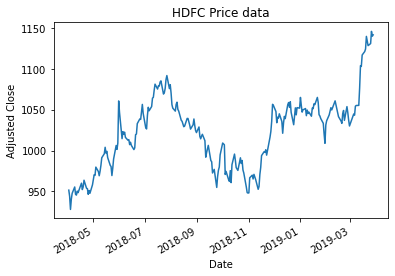

In [21]:
#Visually show the stock price
hdfc['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("HDFC Price data")
plt.show()

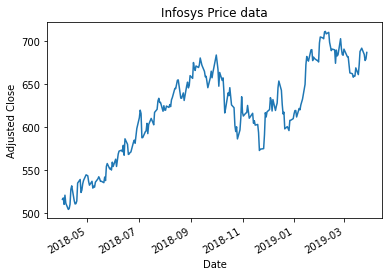

In [22]:
#Visually show the stock price
infy['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Infosys Price data")
plt.show()

#HDFC CALCULATIONS

In [25]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(hdfc.Close)):
  if hdfc.Close[i] > hdfc.Close[i-1]:
    OBV.append(OBV[-1] + hdfc.Volume[i])
  elif hdfc.Close[i] < hdfc.Close[i-1]:
      OBV.append(OBV[-1] - hdfc.Volume[i])
  else:
      OBV.append(OBV[-1])

In [26]:
hdfc['OBV'] = OBV
hdfc['OBV_EMA'] = hdfc['OBV'].ewm(span=20).mean()
#Show the data
hdfc

,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
Date,,,,,,,,
2018-04-02,945.250000,967.875000,945.250000,965.599976,951.427673,2298184,0,0.000000e+00
2018-04-03,961.974976,962.849976,955.500000,957.950012,943.889954,2039942,-2039942,-1.070970e+06
2018-04-04,956.474976,962.474976,939.224976,941.625000,927.804565,1857054,-3896996,-2.108670e+06
2018-04-05,950.650024,957.000000,945.099976,954.450012,940.441345,2429446,-1467550,-1.923588e+06
2018-04-06,956.099976,963.224976,952.900024,961.700012,947.584900,1860004,392454,-1.363357e+06
...,...,...,...,...,...,...,...,...
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940,47022950,2.639791e+07
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630,51622580,2.880026e+07
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424,57516004,3.153509e+07


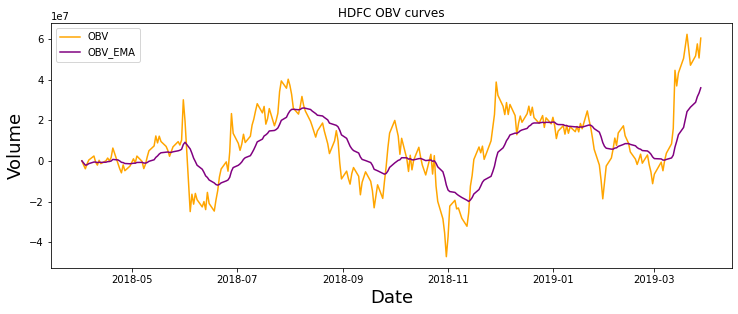

In [32]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(hdfc['OBV'], label = 'OBV', color = 'orange')
plt.plot(hdfc['OBV_EMA'], label = 'OBV_EMA', color = 'purple')

plt.title('HDFC OBV curves')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume', fontsize = 18)
plt.legend()
plt.show()

In [33]:
#Create a function to signal when to buy and sell an asset
#If OBV > OBV_EMA Then Buy
#If OBV < OBV_EMA Then Sell
#Else Do nothing
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the data set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [35]:
x = buy_sell(hdfc, 'OBV','OBV_EMA' )
hdfc['Buy_Signal_Price'] = x[0]
hdfc['Sell_Signal_Price'] = x[1]
#Show the data frame
hdfc

,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2018-04-02,945.250000,967.875000,945.250000,965.599976,951.427673,2298184,0,0.000000e+00,NaN,NaN
2018-04-03,961.974976,962.849976,955.500000,957.950012,943.889954,2039942,-2039942,-1.070970e+06,NaN,957.950012
2018-04-04,956.474976,962.474976,939.224976,941.625000,927.804565,1857054,-3896996,-2.108670e+06,NaN,NaN
2018-04-05,950.650024,957.000000,945.099976,954.450012,940.441345,2429446,-1467550,-1.923588e+06,954.450012,NaN
2018-04-06,956.099976,963.224976,952.900024,961.700012,947.584900,1860004,392454,-1.363357e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940,47022950,2.639791e+07,NaN,NaN
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630,51622580,2.880026e+07,NaN,NaN
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424,57516004,3.153509e+07,NaN,NaN


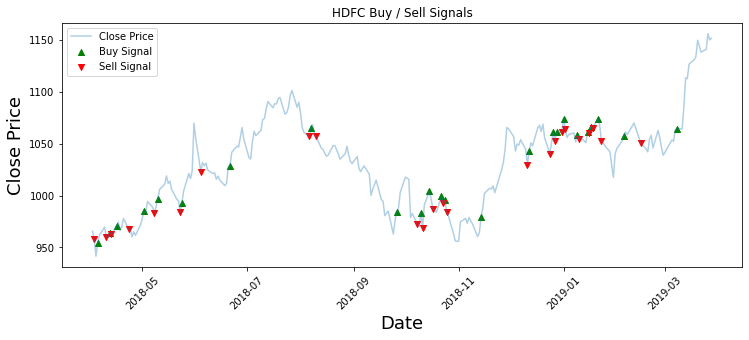

In [37]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5))
plt.scatter(hdfc.index, hdfc['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(hdfc.index, hdfc['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( hdfc['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('HDFC Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend( loc='upper left')
plt.show()

#INFOSYS CALCULATIONS

In [38]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(infy.Close)):
  if infy.Close[i] > infy.Close[i-1]:
    OBV.append(OBV[-1] + infy.Volume[i])
  elif infy.Close[i] < infy.Close[i-1]:
      OBV.append(OBV[-1] - infy.Volume[i])
  else:
      OBV.append(OBV[-1])

In [39]:
infy['OBV'] = OBV
infy['OBV_EMA'] = infy['OBV'].ewm(span=20).mean()
#Show the data
infy

,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
Date,,,,,,,,
2018-04-02,570.500000,574.775024,560.650024,568.575012,516.459229,8072702,0,0.000000e+00
2018-04-03,567.349976,571.775024,564.049988,570.224976,517.957886,4077168,4077168,2.140513e+06
2018-04-04,572.000000,572.275024,560.000000,562.099976,510.577576,4813302,-736134,1.084226e+06
2018-04-05,569.775024,575.650024,564.549988,573.775024,521.182556,7763544,7027410,2.799931e+06
2018-04-06,571.500000,573.000000,561.049988,563.500000,511.849365,5937742,1089668,2.386233e+06
...,...,...,...,...,...,...,...,...
2019-03-22,745.000000,746.349976,732.299988,743.099976,691.513062,8883260,387905584,3.752094e+08
2019-03-25,742.400024,742.400024,730.549988,735.250000,684.208008,7644966,380260618,3.756905e+08
2019-03-26,735.250000,735.250000,719.099976,727.750000,677.228577,9406261,370854357,3.752299e+08


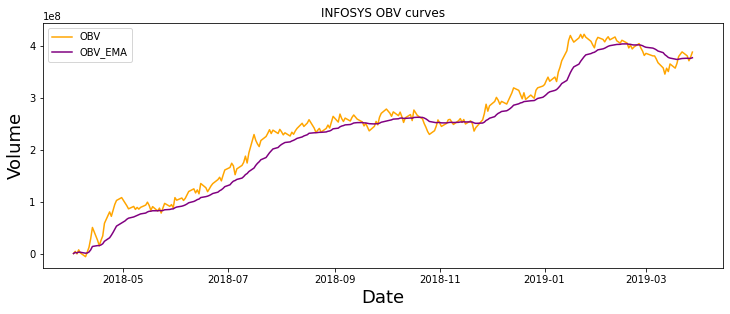

In [40]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(infy['OBV'], label = 'OBV', color = 'orange')
plt.plot(infy['OBV_EMA'], label = 'OBV_EMA', color = 'purple')

plt.title('INFOSYS OBV curves')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume', fontsize = 18)
plt.legend()
plt.show()

In [41]:
x = buy_sell(infy, 'OBV','OBV_EMA' )
infy['Buy_Signal_Price'] = x[0]
infy['Sell_Signal_Price'] = x[1]
#Show the data frame
infy

,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2018-04-02,570.500000,574.775024,560.650024,568.575012,516.459229,8072702,0,0.000000e+00,NaN,NaN
2018-04-03,567.349976,571.775024,564.049988,570.224976,517.957886,4077168,4077168,2.140513e+06,570.224976,NaN
2018-04-04,572.000000,572.275024,560.000000,562.099976,510.577576,4813302,-736134,1.084226e+06,NaN,562.099976
2018-04-05,569.775024,575.650024,564.549988,573.775024,521.182556,7763544,7027410,2.799931e+06,573.775024,NaN
2018-04-06,571.500000,573.000000,561.049988,563.500000,511.849365,5937742,1089668,2.386233e+06,NaN,563.500000
...,...,...,...,...,...,...,...,...,...,...
2019-03-22,745.000000,746.349976,732.299988,743.099976,691.513062,8883260,387905584,3.752094e+08,NaN,NaN
2019-03-25,742.400024,742.400024,730.549988,735.250000,684.208008,7644966,380260618,3.756905e+08,NaN,NaN
2019-03-26,735.250000,735.250000,719.099976,727.750000,677.228577,9406261,370854357,3.752299e+08,NaN,727.750000


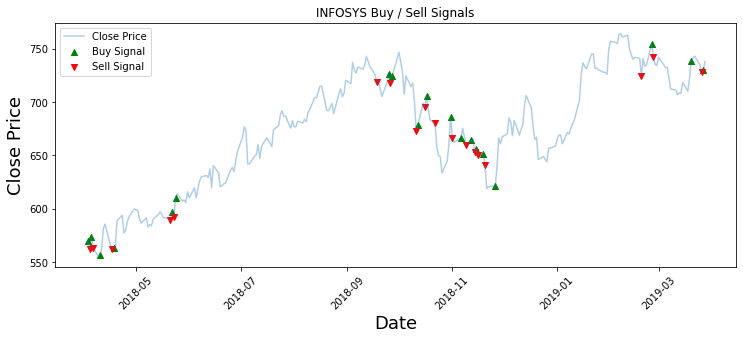

In [45]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5))
plt.scatter(infy.index, infy['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(infy.index, infy['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(infy['Close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title('INFOSYS Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend( loc='upper left')
plt.show()